<a href="https://colab.research.google.com/github/dwhew/data_science/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is the nicest city to live in?

Notes
*   warmest?
*   least rain?
*   has snow?
*   score based on all attributes would be the most objective (maybe number of days could be a good counter and then rank/sort or use index. must prioritise attributes)






In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy



## prelim experimention with data

In [2]:
inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
inndf.head()

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
0,2015-01-01,-3.137500,-7.4,1.0,724.241667,92.458333,1.166667,0.0,Jan,Jan-2015,2015
1,2015-01-02,-3.341667,-9.2,1.5,721.975000,94.875000,1.125000,1.6,Jan,Jan-2015,2015
2,2015-01-03,1.458333,0.4,3.2,717.537500,96.833333,1.791667,13.1,Jan,Jan-2015,2015
3,2015-01-04,2.108333,-0.2,4.6,717.608333,79.291667,3.041667,25.9,Jan,Jan-2015,2015
4,2015-01-05,-0.841667,-5.3,2.4,721.662500,74.875000,2.666667,0.3,Jan,Jan-2015,2015


In [3]:
len(inndf)/365

5.002739726027397

In [4]:
inndf['year'].unique()

array([2015, 2016, 2017, 2018, 2019])

In [5]:
len(inndf.loc[inndf['min_temp (deg C)'] < 0])/5

99.8

In [6]:
inndf.dtypes

date                   object
mean_temp (deg C)     float64
min_temp (deg C)      float64
max_temp (deg C)      float64
mean_pressure (mb)    float64
mean_humidity (%)     float64
mean_wind (ms-1)      float64
precip_sum (mm)       float64
month                  object
month-year             object
year                    int64
dtype: object

In [7]:
inndf['year'].value_counts()

2016    366
2019    365
2018    365
2017    365
2015    365
Name: year, dtype: int64

 # load  city data

In [8]:
#inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
londf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/London_weather_2015-19.csv")
sindf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Singapore_weather_2015-19.csv')
syddf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Sydney_weather_2015-19.csv')
tehdf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Tehran_weather_2015-19.csv')





# Aproach 1. by number of days. I.e sunny days, perfect days...
when higher no. of days is prefered for all columns/attributes, a sum of, or index could be used to objectively rate each city

Idea for what to use
-no rain -done
-mean temp > 15
-min temp > 0

In [9]:
#assign cities to a list for later use
citylist = ['Innsbruck', 'London', 'Singapore', 'Sydney', 'Tehran']
#assign dfs to list for later iterating
dflist = ['inndf', 'londf', 'sindf', 'syddf', 'tehdf']

## No. of days without rain (annual average)

In [10]:
# Here I iterated through a list of the dataframes 'dflist'. this is neater than writing the code for each city but hard to read. would be really usefull for when there are alot more cities. 
# it would also make it easier to add more cities later

#no. of days without rain (annual average)
for i in dflist:
  exec(str(i) + '_nrain = len(' + str(i) + '[' + str(i) + '[\'precip_sum (mm)\'] == 0.0]) /5')
#e.g. for readabiltiy: inn_nrain = len(inndf[inndf['precip_sum (mm)'] == 0.0]) /5



In [11]:
#perfect days
inn_perf = inndf[(inndf["precip_sum (mm)"] == 0.0) & (inndf["max_temp (deg C)"] > 25) & (inndf["min_temp (deg C)"] > 10) & (inndf["mean_wind (ms-1)"] < 4)]
inn_perf

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
137,2015-05-18,18.804167,12.4,27.8,708.341667,62.708333,2.500000,0.0,May,May-2015,2015
155,2015-06-05,24.300000,15.0,32.1,714.460000,59.700000,1.900000,0.0,Jun,Jun-2015,2015
176,2015-06-26,19.410000,10.1,25.7,714.620000,57.400000,2.000000,0.0,Jun,Jun-2015,2015
179,2015-06-29,20.310000,12.6,26.3,714.800000,60.800000,1.600000,0.0,Jun,Jun-2015,2015
180,2015-06-30,21.830000,12.5,29.3,714.460000,58.000000,1.800000,0.0,Jun,Jun-2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
1702,2019-08-30,20.079167,13.3,28.0,715.533333,74.083333,1.750000,0.0,Aug,Aug-2019,2019
1703,2019-08-31,20.912500,13.5,30.1,712.175000,68.958333,3.416667,0.0,Aug,Aug-2019,2019
1718,2019-09-15,18.520833,11.1,27.8,717.195833,75.875000,1.375000,0.0,Sep,Sep-2019,2019
1719,2019-09-16,18.666667,11.7,27.9,713.920833,73.666667,1.416667,0.0,Sep,Sep-2019,2019


In [12]:
#create new dataframe
citystats = pd.DataFrame({'City': citylist })
citystats['Days of no rain'] = [inndf_nrain, londf_nrain, sindf_nrain, syddf_nrain, tehdf_nrain]
citystats.sort_values(by=['Days of no rain'], ascending=False)

,City,Days of no rain
4,Tehran,308.8
3,Sydney,205.6
1,London,198.0
2,Singapore,183.6
0,Innsbruck,165.8


note for later: barometric pressure over 1022.689 mb indicates clear and stable (google.com)

# Aproach 2. group by months

In [13]:
#get average day by month
month_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

inndf_months = inndf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
londf_months = londf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
sindf_months = sindf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
syddf_months = syddf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
tehdf_months = tehdf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])



In [14]:
#compare two data frames 
inndf_months.compare(londf_months, keep_equal=True)

mean_temp (deg C)             ... precip_sum (mm)          
                   self      other  ...            self     other
month                               ...                          
Jan           -1.036986   5.452045  ...        7.080000  2.601290
Feb            1.459536   5.888956  ...        3.158865  1.994326
Mar            6.061640   7.928891  ...        4.507097  2.336000
Apr           10.601215  10.405160  ...        5.587333  1.433333
May           14.001605  13.945328  ...       10.334839  2.233548
Jun           18.983879  17.205025  ...       11.106667  2.381333
Jul           19.910417  19.583573  ...       11.485806  2.394839
Aug           19.554905  18.449890  ...       14.955484  2.714839
Sep           14.570158  15.556601  ...        9.295333  2.246667
Oct           10.473568  12.279683  ...        5.921935  2.256774
Nov            5.024660   8.424954  ...        4.234000  2.818667
Dec            0.367959   7.878952  ...        4.063226  2.921290

[12 rows x 14 columns]

In [15]:
# using the sum (total) of monthly rianfall would be better
# create new dfs for groupby.sum()

for i in dflist:
  exec(str(i) + '_sum = ' + str(i) + '.groupby(by=[\'month\']).sum().reindex(month_ordered)')

# substitute the rainfall data into inndf_months (and divide by no. of years)

for i in dflist:
  exec(str(i) + '_months[\'precip_sum (mm)\'] = ' + str(i) + '_sum[\'precip_sum (mm)\']/5')

#check a df
londf_months


,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm)
month,,,,,,,
Jan,5.452045,2.170323,8.486452,759.047569,83.969628,4.520082,80.64
Feb,5.888956,2.643262,9.282979,759.464393,80.577975,4.467551,56.24
Mar,7.928891,4.552667,11.810000,758.189557,76.876010,4.769790,70.08
Apr,10.405160,6.032000,15.349333,760.006455,70.594834,3.937399,43.00
May,13.945328,9.387742,19.108387,759.972213,69.518787,4.023179,69.24
Jun,17.205025,12.597333,22.528667,760.063668,69.837063,4.277428,71.44
Jul,19.583573,14.866452,25.020000,759.527604,65.276267,4.183529,74.24
Aug,18.449890,14.087097,23.680645,759.849124,70.730940,4.091937,84.16
Sep,15.556601,11.391333,20.480000,760.780904,74.847995,3.991965,67.40


In [16]:
sindf

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
0,2015-01-01,25.7750,24.8,27.5,757.4750,85.250,2.250,0.6,Jan,Jan-2015,2015
1,2015-01-02,26.9250,24.5,30.3,757.8500,76.750,3.125,0.0,Jan,Jan-2015,2015
2,2015-01-03,27.1625,24.6,30.7,757.3000,75.500,2.750,0.0,Jan,Jan-2015,2015
3,2015-01-04,27.5125,24.8,32.1,756.3625,74.125,2.625,0.0,Jan,Jan-2015,2015
4,2015-01-05,27.8625,25.0,32.4,756.0500,74.625,2.625,0.0,Jan,Jan-2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,27.6375,25.1,31.4,756.8375,77.125,3.875,0.0,Dec,Dec-2019,2019
1822,2019-12-28,27.6375,25.5,31.1,756.9625,78.375,3.875,0.0,Dec,Dec-2019,2019
1823,2019-12-29,27.8625,25.7,31.6,757.0625,78.000,4.000,0.0,Dec,Dec-2019,2019
1824,2019-12-30,28.0000,25.5,31.6,757.3625,77.125,3.500,0.0,Dec,Dec-2019,2019


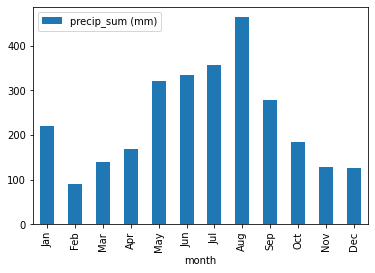

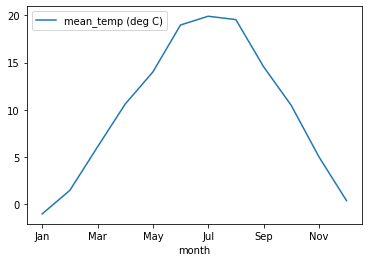

In [17]:
#graphs
inndf_months.plot(y=['precip_sum (mm)'], kind= 'bar')
inndf_months.plot(y=['mean_temp (deg C)'])

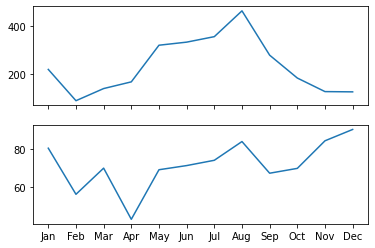

In [18]:
#Plot with subplots (still learning this one, needs work)
fig, (ax, ax1) = plt.subplots(2, sharex=True)

ax.plot(inndf_months['precip_sum (mm)'])
ax1.plot(londf_months['precip_sum (mm)'])


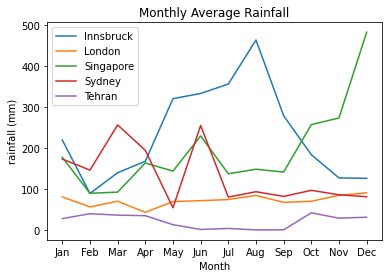

In [19]:
#plot on same graph
plt.plot(inndf_months['precip_sum (mm)'])
plt.plot(londf_months['precip_sum (mm)'])
plt.plot(sindf_months['precip_sum (mm)'])
plt.plot(syddf_months['precip_sum (mm)'])
plt.plot(tehdf_months['precip_sum (mm)'])
plt.title('Monthly Average Rainfall')
plt.xlabel('Month')
plt.ylabel('rainfall (mm)')
plt.legend(citylist)
plt.show()

# statistical comparisons

In [20]:

# Analysis of Variance Test (ANOVA) 
from scipy.stats import f_oneway

#compare mean temperatures between innsbruck and london
stat, p = f_oneway(inndf_months['precip_sum (mm)'], londf_months['precip_sum (mm)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Not Significantly different')
else:
	print('Significantly different')


stat=23.233, p=0.000
Significantly different
